# Lab 5 (Solutions)

## Exercise 1

One way to visualize fixed-point iteration is through a cobweb plot.  (see:  https://www.johndcook.com/blog/2020/01/19/cobweb-plots/) modify our fixed-point iteration code to draw the cobweb plot and use the new code to see the last two examples discussed in notes.  Hint:  `plt.plot([x1,x2],[y1,y2]` can be used to plot the line segment form $(x_1,y_1) \text{ to } (x_2,y_2)$

p_n		 g(p_n)
1.000000	 0.000000	
0.000000	 -3.000000	
-3.000000	 96.000000	
96.000000	 84953085.000000	
84953085.000000	 52085473681492913685918814044160.000000	


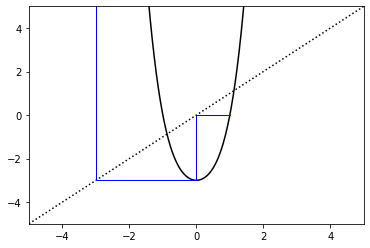

p_n		 g(p_n)
1.000000	 1.189207	
1.189207	 1.080058	
1.080058	 1.149671	
1.149671	 1.107821	
1.107821	 1.133932	
1.133932	 1.118003	
1.118003	 1.127857	
1.127857	 1.121813	
1.121813	 1.125540	
1.125540	 1.123249	


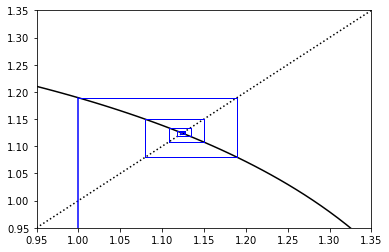

In [5]:
import numpy as np
from matplotlib import pyplot as plt

def print_heading(): 
    print('p_n\t\t', 
          'g(p_n)')
    
def print_row(p, fp): 
    print('%6f\t' % p, \
          '%6f\t' % fp)

def fixed_point_iteration_with_cobweb(func, p0, n_max, x_min, x_max):
    print_heading()     
    p = p0
    
    # plot function and y=x
    x=np.arange(x_min,x_max,0.01)
    plt.plot(x,x,'k:')
    plt.plot(x,func(x),'k')
    plt.plot([p0,p0],[0,func(p0)],'b')
    
    for n in range(n_max):
        print_row(p, func(p))
        p_old = p
        p = func(p)
        # plot cobweb
        plt.plot([p_old, p], [p,  p], 'b', linewidth=1)
        plt.plot([p, p], [p, func(p)], 'b', linewidth=1)
    plt.axis([x_min,x_max,x_min,x_max])
    plt.show()
    return p

g1 = lambda x: x**4 + 2*x**2 - 3
root = fixed_point_iteration_with_cobweb(g1, p0=1, n_max=5, x_min=-5,x_max=5)

g2 = lambda x: (3 + x - 2*x**2)**0.25
root = fixed_point_iteration_with_cobweb(g2, p0=1, n_max=10,x_min=.95,x_max=1.35)



## Exercise 2

Consider the function 

$$ f(x) = \frac{1}{4} - \frac{\sin(4x)}{x}.$$

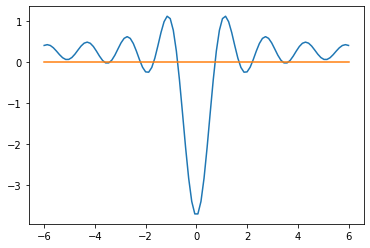

In [2]:
import numpy as np
from matplotlib import pyplot as plt

f = lambda x: 0.25 - np.sin(4*x)/x
g = lambda x: 0*x
x = np.linspace(-6,6,100)

plt.plot(x, f(x))
plt.plot(x, g(x))
plt.show()

Write a python function that generates two lists.  One for values just to the left of the roots and another for values just to the right of the roots for a given grid.  Hint:  Use the Intermediate Value Theorem.

In [6]:
import numpy as np

f = lambda x: 0.25 - np.sin(4*x)/x
grid = np.linspace(-6,6,100)

left_end = []
right_end = []
for i in range(len(grid)-1):
    if f(grid[i])*f(grid[i+1])<0:
        #print(grid[i])
        left_end.append(grid[i])
        right_end.append(grid[i+1])
print('Left Endpoints: ',left_end)
print('Right Endpoints: ',right_end)

Left Endpoints:  [-3.696969696969697, -3.4545454545454546, -2.242424242424242, -1.7575757575757578, -0.7878787878787881, 0.666666666666667, 1.6363636363636367, 2.121212121212121, 3.333333333333334, 3.575757575757576]
Right Endpoints:  [-3.5757575757575757, -3.333333333333333, -2.121212121212121, -1.6363636363636367, -0.6666666666666661, 0.7878787878787881, 1.7575757575757578, 2.242424242424242, 3.454545454545455, 3.6969696969696972]


# Lab 6

## Exercise 1


Write a function `newton` that uses the Newton method to compute the zeros of a function.  Hint:  Newton is summarized in Algo 2.3 in the Text

In [9]:
def newton(f, df, p0, TOL, Nmax):
    # INPUT: function f, derivative of f df, an initial guess p0, tolerance TOL, maximum number of
    # iterations Nmax
#     f=func
#     fprime= dfunc
#     p0= 1
#     TOL= 4
#     Nmax= 10
    

    # OUTPUT: an approximate root p of f(x) = 0 found with Newton's method
    p = p0
    for i in range(Nmax):
        p = p - f(p)/df(p)
        
        if abs(f(p)) < TOL:
            print('number of iterations:', i)
            return p
    
    
    print('Max iterations reached. :(')
    # your code here
    pass

Use Newton’s method to find solutions accurate to within $10^{-4}$ for the following problems.

- $x^3-2x^2-5=0, \quad [1,4]$
- $x^3+3x^2-1=0, \quad [-3,-2]$
- $x-\cos{x}=0, \quad [0, \pi/2]$
- $x-0.8-0.2\sin{x}=0, \quad [0, \pi/2]$

In [10]:
func = lambda x: x**3 -2*x**2 -5
dfunc= lambda x: 3*x**2 -4*x
print(newton(func, dfunc, 2, 1e-4, 100))

number of iterations: 4
2.690647448517619


The fourth-degree polynomial
$$f(x)=230x^4+18x^3+9x^2-221x-9$$
has two real zeros, one in $[-1,0]$ and the other in $[0,1]$. Attempt to approximate these zeros to within $10^{-6}$ using Newton's method.

In [11]:
func2 = lambda x: x**3 +3*x**2 -1 
dfunc2 = lambda x: 3*x**2 +6*x

print(newton(func2, dfunc2, -2.5, 1e-4, 100))

number of iterations: 3
-2.87938532466927


In [20]:
import numpy as np
func3 = lambda x: x - np.cos(x)
dfunc3 = lambda x: 1 + np.sin(x)

print(newton(func3, dfunc3, .5, 1e-4, 100))

number of iterations: 1
0.7391416661498792


In [18]:
func4 = lambda x: x - .8 - .2*np.sin(x) 
dfunc4 = lambda x: 1 -.2*np.cos(x)

print(newton(func4, dfunc4, 1, 1e-4, 100))

number of iterations: 1
0.9643338890103158


In [23]:
ff = lambda x: 230*x**4 + 18*x**3 + 9*x**2 - 221*x -9
dff = lambda x: 920*x**3 + 54*x**2 + 18*x -221

print(newton( ff, dff, -.5, 1e-6, 100))
print(newton( ff, dff, .5, 1e-6, 100))


number of iterations: 3
-0.04065928831575899
number of iterations: 4
-0.04065928834533494
